<a href="https://colab.research.google.com/github/Amrit1799/Cognitive-Analysis/blob/main/CA_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Datasets and libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')
data=pd.read_csv('/content/Drive/My Drive/biddings.csv')

Mounted at /content/Drive


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,0.50,-0.55,-0.27,-0.89,-0.01,-0.53,1.19,-0.36,0.07,0.01,0.08,0.06,0.18,0.47,0.33,0.49,-0.33,0.32,-0.05,0.20,0.12,-0.07,0.11,0.07,-0.04,-0.12,-0.00,-0.08,-0.02,...,-0.41,-0.62,-1.09,-0.27,0.03,-0.15,-1.67,0.49,-0.08,-0.10,-0.31,-0.20,1.16,-0.49,-0.26,1.34,1.02,1.28,-0.58,-1.17,0.02,-1.59,-1.17,-0.59,0.76,0.05,1.06,-0.12,0.18,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,-0.23,-0.07,0.61,1.04,-1.99,1.85,0.69,0.22,3.86,0.14,0.39,0.51,0.61,1.06,0.74,0.33,0.09,-0.12,0.16,0.16,0.16,-0.00,-0.01,-0.02,-0.13,-0.08,-0.06,-0.00,0.02,...,-0.23,-0.18,0.43,0.56,-1.62,-0.67,-1.53,0.64,0.24,-1.03,-0.49,-0.62,-1.75,0.12,0.07,-0.17,1.30,1.52,-0.56,-0.99,1.14,1.20,-1.82,3.23,1.23,0.08,1.17,-1.43,2.69,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,1.17,-0.54,-0.21,-0.21,-1.44,-0.92,-0.78,0.45,-0.03,-0.09,0.16,0.30,-0.83,0.05,1.43,1.33,-0.85,0.20,-0.11,0.39,0.13,0.01,0.09,-0.01,-0.12,-0.03,-0.03,0.06,0.06,...,0.17,-0.04,2.03,0.00,-0.66,0.77,-1.05,0.47,0.77,0.50,-1.14,-1.12,-0.34,0.40,-0.39,-0.21,-1.23,0.44,-0.12,-0.40,-0.54,0.63,0.27,-1.06,-0.38,0.11,0.43,-0.44,0.55,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,-0.27,0.02,0.30,0.79,-2.49,0.44,0.69,0.32,3.81,0.15,-0.23,0.45,0.58,0.87,0.81,0.02,0.11,-0.09,0.09,0.12,0.15,0.02,-0.02,0.02,0.17,-0.17,-0.01,0.04,0.02,...,-0.28,-0.23,-0.45,0.68,-0.98,0.24,-0.54,1.93,-0.06,-0.33,0.41,0.03,0.77,0.15,-0.28,-0.52,0.33,0.87,-0.34,0.26,-0.57,0.52,0.23,-0.58,-0.12,0.06,-0.74,0.56,0.39,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,-1.12,4.90,-0.49,3.59,2.74,0.94,1.34,-0.61,0.44,0.38,-0.53,0.07,0.64,-0.68,-0.92,-1.68,0.81,0.17,-0.44,1.38,0.82,0.48,-0.32,-0.83,0.80,-1.52,0.07,0.54,0.14,...,-0.15,-0.57,-0.31,-0.07,-0.04,0.22,-0.01,0.22,-0.20,-0.30,-1.68,-0.04,0.43,-0.09,0.00,0.54,-1.74,-0.87,0.74,1.48,0.19,0.82,0.49,0.59,1.71,-0.02,-0.77,-0.68,0.38,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


In [ ]:
data.isnull().sum()

0          0
1          0
2          0
3          0
4          0
          ..
84         0
85         0
86         0
87         0
convert    0
Length: 89, dtype: int64

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-0.005883,-0.000817,0.000731,-0.000602,-0.000907,-0.001622,-0.001113,-0.000849,-0.000038,0.001315,-0.000326,0.001257,0.000527,-0.001628,0.000274,-0.000485,0.001404,0.000906,-0.000052,0.002367,0.000175,0.000915,0.000423,0.000427,-0.001146,-0.000702,0.00078,-0.000228,0.000304,-0.000123,-0.000500,-0.001007,0.001511,-0.000595,0.000998,-0.000123,0.000181,0.000417,0.000402,0.000808,...,0.000628,-0.000850,0.001055,-0.000925,0.000648,0.000129,0.000603,-0.001392,-0.000477,-0.000938,0.000822,0.000441,-0.000131,-0.000728,-0.000056,-0.000498,0.000464,0.000513,0.000088,-0.000119,0.000033,0.000652,0.000137,0.000741,-0.000758,-0.000218,0.000401,0.000491,0.000496,-0.000748,-0.000268,-0.000196,-0.000226,-0.000953,-0.000306,0.000146,-0.000700,-0.000626,0.000132,0.001908
std,0.095058,2.940689,2.474237,2.031199,1.710268,1.554487,1.529738,1.487838,1.474423,1.435716,1.413214,1.400071,1.377710,1.368248,1.322192,1.294610,1.267256,1.205973,1.197245,1.130794,1.092198,1.089813,1.064290,1.058732,1.052791,1.038850,1.03008,1.021575,1.006758,1.008781,1.000935,1.005177,1.005456,1.002771,0.999475,0.989988,0.974646,0.997624,0.992253,0.305064,...,0.963353,0.957602,0.955571,0.955710,0.952033,0.936431,0.935443,0.932168,0.925701,0.898043,0.902311,0.890745,0.884639,0.877115,0.869993,0.842438,0.839385,0.838197,0.838951,0.816145,0.814398,0.812868,0.803102,0.796391,0.795025,0.792489,0.780840,0.776613,0.771587,0.765399,0.757660,0.759999,0.759698,0.751190,0.745389,0.742625,0.667258,0.639425,0.649761,0.043639
min,-0.020000,-28.470000,-20.050000,-1.550000,-17.930000,-14.980000,-8.280000,-41.790000,-49.710000,-12.710000,-7.590000,-30.200000,-13.140000,-19.380000,-15.910000,-10.980000,-6.900000,-7.420000,-21.450000,-12.200000,-39.020000,-8.820000,-55.620000,-19.000000,-61.730000,-11.030000,-13.72000,-24.920000,-30.920000,-21.810000,-114.510000,-29.680000,-9.880000,-17.810000,-49.310000,-27.210000,-168.680000,-13.310000,-38.550000,-25.980000,...,-82.830000,-87.400000,-32.760000,-61.100000,-59.960000,-9.060000,-19.680000,-11.880000,-26.410000,-44.740000,-5.810000,-28.510000,-5.630000,-10.520000,-4.010000,-5.870000,-5.240000,-10.280000,-20.690000,-5.740000,-4.590000,-4.570000,-2.700000,-5.550000,-5.250000,-15.770000,-5.020000,-4.730000,-5.610000,-4.660000,-9.660000,-4.510000,-5.380000,-5.790000,-3.670000,-5.180000,-4.250000,-15.110000,-30.370000,0.000000
25%,-0.020000,-1.220000,-2.070000,-0.600000,-0.670000,-0.010000,-0.160000,-0.510000,-0.280000,-0.390000,-0.390000,-0.420000,-0.420000,-0.640000,-0.570000,-0.960000,-0.690000,-0.650000,-0.370000,-0.110

**Drawing a Histogram to see if the data is balanced on not.**

Text(0, 0.5, 'Count')

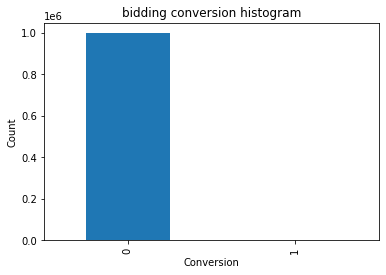

In [ ]:
count_classes = pd.value_counts(data['convert'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("bidding conversion histogram")
plt.xlabel("Conversion")
plt.ylabel("Count")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Performing Under and Over Sampling over the data**

In [ ]:
Y = data['convert']
X = data.drop('convert',axis=1)

over=RandomOverSampler(sampling_strategy=0.1)
X_1,Y_1=over.fit_resample(X,Y)
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_2,Y_2=undersample.fit_resample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Using Logistic Regression Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Using OverSampled Data For classification using Logistic Regression.**

In [ ]:
X_train_o, X_test_o, Y_train_o, Y_test_o = train_test_split(X_1, Y_1, test_size=0.2, random_state=0 )

In [ ]:
model = LogisticRegression()
model.fit(X_train_o,Y_train_o)
Y_pred_o = model.predict(X_test_o)
Y_pred_o

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_o, Y_pred_o))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    199847
           1       0.44      0.01      0.01     19734

    accuracy                           0.91    219581
   macro avg       0.67      0.50      0.48    219581
weighted avg       0.87      0.91      0.87    219581



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_o, Y_pred_o)
print(confusion_matrix)

[[199704    143]
 [ 19623    111]]


**Accuracy**

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_o, Y_test_o)))

Accuracy of logistic regression classifier on test set: 0.91


**Using Under-Sampled Data For classification using Logistic Regression.**

In [ ]:
X_train_u, X_test_u, Y_train_u, Y_test_u = train_test_split(X_2, Y_2, test_size=0.2, random_state=0 )

In [ ]:
model.fit(X_train_u,Y_train_u)
Y_pred_u = model.predict(X_test_u)
Y_pred_u

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

**Classification Report**

In [ ]:
print(classification_report(Y_test_u, Y_pred_u))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       775
           1       0.56      0.29      0.39       370

    accuracy                           0.70      1145
   macro avg       0.65      0.59      0.59      1145
weighted avg       0.67      0.70      0.67      1145



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_u, Y_pred_u)
print(confusion_matrix)

[[691  84]
 [261 109]]


**Accuracy**

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_u, Y_test_u)))

Accuracy of logistic regression classifier on test set: 0.70


**We see the area under the curve of ROC curve is almost same for both oversampling and UnderSampling**

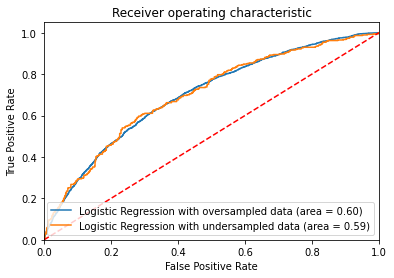

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test_o, model.predict(X_test_o))
fpr, tpr, thresholds = roc_curve(Y_test_o, model.predict_proba(X_test_o)[:,1])
logit_roc_auc1 = roc_auc_score(Y_test_u, model.predict(X_test_u))
fpr1, tpr1, thresholds1 = roc_curve(Y_test_u, model.predict_proba(X_test_u)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with oversampled data (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr1, tpr1, label='Logistic Regression with undersampled data (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()